##**1. Import Library**

In [ ]:
# install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC, SMOTE

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score,ShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Performance in Exam/clean_dataset.csv')
df

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,ebrw_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,73.0,not_passed
1,female,group C,some college,standard,completed,69,89.0,passed
2,female,group B,master's degree,standard,none,90,94.0,passed
3,male,group A,associate's degree,free/reduced,none,47,50.5,not_passed
4,male,group C,some college,standard,none,76,76.5,passed
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,97.0,passed
996,male,group C,high school,free/reduced,none,62,55.0,not_passed
997,female,group C,high school,free/reduced,completed,59,68.0,not_passed
998,female,group D,some college,standard,completed,68,77.5,not_passed


In [ ]:
# check missing values
df.isna().sum()

gender                         0
race                           0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
ebrw_score                     0
passing_score                  0
dtype: int64

In [ ]:
# check duplicated values
df.duplicated().sum()

0

##**3. Feature Engineering**

###**b. Data Encoding**

In [ ]:
# copy previous dataframe
df_fe = df.copy()
df_fe

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,ebrw_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,73.0,not_passed
1,female,group C,some college,standard,completed,69,89.0,passed
2,female,group B,master's degree,standard,none,90,94.0,passed
3,male,group A,associate's degree,free/reduced,none,47,50.5,not_passed
4,male,group C,some college,standard,none,76,76.5,passed
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,97.0,passed
996,male,group C,high school,free/reduced,none,62,55.0,not_passed
997,female,group C,high school,free/reduced,completed,59,68.0,not_passed
998,female,group D,some college,standard,completed,68,77.5,not_passed


In [ ]:
# list of columns according to data type
cat_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='O') and (cols != 'parental_level_of_education') and (cols != 'passing_score')]
num_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='int64') or (df_fe[cols].dtype=='float64')]
ord_feats = ['parental_level_of_education']
label = ['passing_score']

In [ ]:
# Inisialisasi objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding label pada kolom 'passing_score'
df_fe['passing_score'] = le.fit_transform(df_fe['passing_score'])

In [ ]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'parental_level_of_education',
    'mapping': {'some high school':0, 'high school':1,
                'some college':2, "associate's degree":3,
                "bachelor's degree":4, "master's degree":5}}]


In [ ]:
# encoding ordinal features with OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=ord_feats, mapping=ordinal_mapping)
df_fe = ord_encoder.fit_transform(df_fe)

In [ ]:
# encoding categorical features with TargetEncoder
encoder = TargetEncoder()
df_fe[cat_feats] = encoder.fit_transform(df_fe[cat_feats], df_fe['passing_score'])

In [ ]:
# check dataframe after encoding
df_fe

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,ebrw_score,passing_score
0,0.320463,0.268421,4,0.368992,0.249221,72,73.0,0
1,0.320463,0.253918,2,0.368992,0.402235,69,89.0,1
2,0.320463,0.268421,5,0.368992,0.249221,90,94.0,1
3,0.286307,0.202350,3,0.185915,0.249221,47,50.5,0
4,0.286307,0.253918,2,0.368992,0.249221,76,76.5,1
...,...,...,...,...,...,...,...,...
995,0.320463,0.492856,5,0.368992,0.402235,88,97.0,1
996,0.286307,0.253918,1,0.185915,0.249221,62,55.0,0
997,0.320463,0.253918,1,0.185915,0.402235,59,68.0,0
998,0.320463,0.324427,2,0.368992,0.402235,68,77.5,0


In [ ]:
df_fe.passing_score.value_counts()

0    696
1    304
Name: passing_score, dtype: int64

###**b. Features Selection**

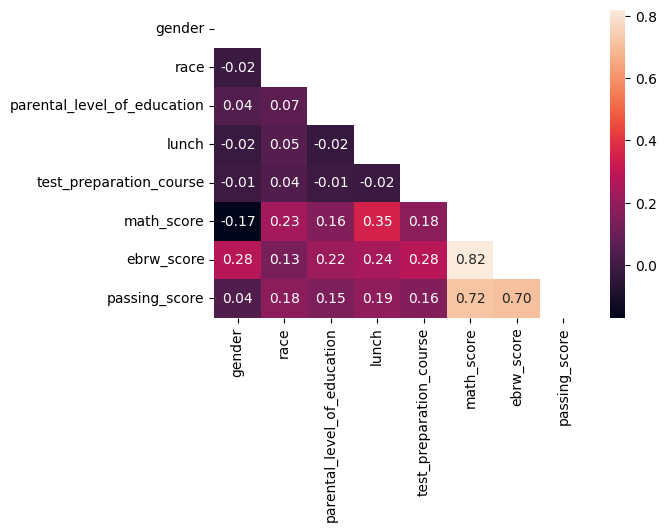

In [ ]:
# check correlation all features with heatmap
corr_ = df_fe.corr()
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_fe.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()


In [ ]:
def calculate_VIF(data):
    X = sm.add_constant(data.iloc[:,:-1])
    vif_data = pd.DataFrame([variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))],
                        index = X.columns).reset_index()
    vif_data.columns = ['feature','VIF']
    vif_data = vif_data.loc[vif_data.feature!='const']

    return(vif_data)

In [ ]:
calculate_VIF(df_fe)

,feature,VIF
1,gender,2.472516
2,race,1.102735
3,parental_level_of_education,1.071993
4,lunch,1.188138
5,test_preparation_course,1.173187
6,math_score,7.770412
7,ebrw_score,8.033503


##**4. Modeling**

In [ ]:
# check dataframe
df_mod = df.copy()
df_mod

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,ebrw_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,73.0,not_passed
1,female,group C,some college,standard,completed,69,89.0,passed
2,female,group B,master's degree,standard,none,90,94.0,passed
3,male,group A,associate's degree,free/reduced,none,47,50.5,not_passed
4,male,group C,some college,standard,none,76,76.5,passed
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,97.0,passed
996,male,group C,high school,free/reduced,none,62,55.0,not_passed
997,female,group C,high school,free/reduced,completed,59,68.0,not_passed
998,female,group D,some college,standard,completed,68,77.5,not_passed


###**a. Split Train & Test**

In [ ]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Encoding labels in column 'passing_score'
df_mod['passing_score'] = le.fit_transform(df_mod['passing_score'])

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['passing_score'])
y = df_mod['passing_score']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.20, random_state= 42)

In [ ]:
# check sample after split
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(800, 7)
(800,)
(200, 7)
(200,)


In [ ]:
def shannon_entropy_score(data, target_column):
    from collections import Counter
    from numpy import log


    n = len(data[target_column])
    classes = [(clas,float(count)) for clas,count in Counter(data[target_column]).items()]
    k = len(classes)

    H = -np.sum([(count/n) * np.log((count/n)) for clas,count in classes]) #shannon entropy
    B = H/np.log(k)

    return (f'Shannon Entropy Score: {B}')

In [ ]:
shannon_entropy_score(df,'passing_score')

'Shannon Entropy Score: 0.8861256474645222'

> - Dari skor shannon entropy dapat dikatakan bahwa kelas dalam label memiliki proporsi yang tidak seimbang yang bisa dikategorikan ringan (Mild Imbalance Data).
> - Semakin besar skor shannon entropy (mendekati 1) menunjukkan bahwa proporsi kelas pada label semakin seimbang (balance). Sebaliknya apabila skor semakin kecil (mendekati 0), maka proporsi kelas pada label semakin tidak seimbang (imbalance).
> - Keputusan yang diambil disini yaitu kita ingin melakukan oversampling dengan SMOTE untuk lebih menyeimbangkan kelas dalam label yang ada dalam dataset.
> - Keputusan melakukan oversampling disesuaikan dengan konteks analisa dari dataset yang digunakan.

###**b. Pipeline**

In [ ]:
# define categorical, numerical, and ordinal columns
categorical_feature = ['gender', 'race', 'lunch', 'test_preparation_course']
numerical_feature = ['math_score', 'ebrw_score']
ordinal_feature = ['parental_level_of_education']

In [ ]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'parental_level_of_education',
    'mapping': {'some high school':0, 'high school':1,
                'some college':2, "associate's degree":3,
                "bachelor's degree":4, "master's degree":5}}]

# encoding ordinal features with OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=ordinal_feature, mapping=ordinal_mapping)

In [ ]:
# use ColumnTransformer to encode features for pipeline purposes
preprocessor = ColumnTransformer(
      transformers=[('categorical', TargetEncoder(), categorical_feature),
                    ('numerical', RobustScaler(), numerical_feature),
                    ('ordinal', ord_encoder, ordinal_feature)])

In [ ]:
set_config(display='diagram')

###**c. Modeling**

In [ ]:
# define the ml algoritms
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(random_state=42)

In [ ]:
# define the metrics evaluation
metrics = ['accuracy','precision','recall','f1_micro','roc_auc','average_precision']

In [ ]:
# create empty list for save result after cross validation
models = []
scores = []

In [ ]:
ml_models = [logreg, dt, rf, xgb, svc]

for i in ml_models:
    skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    estimator=Pipeline([
            ('preprocessor', preprocessor),
            ('resampling', SMOTE(random_state=42)),
            ('model',i)])
    estimator.fit(X_train, y_train)

    cross_val = cross_validate(estimator,
                               X_train, y_train,
                               cv=skfold,
                               scoring= metrics,
                               n_jobs=-1)
    models.append(f'{i.__class__.__name__}')
    scores.append(list(cross_val.values())[2:])

####**- Benchmark Model**

In [ ]:
df_models = pd.DataFrame([[scores[i][j].mean() for j in range(len(metrics))] for i in range(len(models))],
                         index=models,
                         columns=metrics).sort_values('average_precision', ascending=False)

df_models

,accuracy,precision,recall,f1_micro,roc_auc,average_precision
LogisticRegression,0.98250,0.946516,1.000000,0.98250,1.000000,1.000000
XGBClassifier,0.98750,0.976769,0.983667,0.98750,0.999853,0.999679
SVC,0.97250,0.918282,1.000000,0.97250,0.999777,0.999513
RandomForestClassifier,0.99125,0.988000,0.983833,0.99125,0.999665,0.999123
DecisionTreeClassifier,0.98500,0.980295,0.971167,0.98500,0.981103,0.960385


###**d. Hyperparameter Tuning**

In [ ]:
tuned_models = ['RandomForestClassifierTuned', 'XGBClassifierTuned']
fine_tuned_models = []
tuned_scores = []

In [ ]:
%%time
# define the parameters for random forest model's tuned
rfr_params = {
    'forest__n_estimators': list(np.arange(10, 300)),
    'forest__max_depth': list(np.arange(1, 20)),
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False],
    'forest__criterion': ["gini", "entropy"]
}

Random_Forest_tuned = RandomForestClassifier(random_state=42)
forest_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('forest',Random_Forest_tuned)])
forest_pipe_tuned.fit(X_train, y_train)

forest_cv = RandomizedSearchCV(forest_pipe_tuned,
                               rfr_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'forest__n_estimators': 29, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 2, 'forest__max_features': 'auto', 'forest__max_depth': 12, 'forest__criterion': 'entropy', 'forest__bootstrap': True}
CPU times: user 1.9 s, sys: 121 ms, total: 2.02 s
Wall time: 42.3 s


In [ ]:
%%time
# Define the parameters for XGBoost tuned
xgb_params = {
    'xgb__n_estimators': [100, 200, 250, 400, 500],
    'xgb__max_depth': [5, 10, 15, 20],
    'xgb__learning_rate': [0.05, 0.01, 0.1],
    'xgb__subsample': [0.5, 1],
    'xgb__colsample_bytree': [0.8, 0.9],
    'xgb__min_child_weight': [1],
    'xgb__gamma': [i/10.0 for i in range(0, 6)],
    'xgb__reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 4.5]
}

XGBoost_tuned = XGBClassifier(random_state=42)
xgb_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('xgb',XGBoost_tuned)])
xgb_pipe_tuned.fit(X_train, y_train)

xgb_cv = RandomizedSearchCV(xgb_pipe_tuned,
                               xgb_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'xgb__subsample': 1, 'xgb__reg_lambda': 2, 'xgb__n_estimators': 400, 'xgb__min_child_weight': 1, 'xgb__max_depth': 20, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.8}
CPU times: user 1.53 s, sys: 96.8 ms, total: 1.62 s
Wall time: 29.6 s


###**e. Evaluation Metrics**

In [ ]:
fine_tuned_models.append(forest_cv.best_estimator_)
fine_tuned_models.append(xgb_cv.best_estimator_)

for i in fine_tuned_models:
    cross_val = cross_validate(i, X_train, y_train, cv= skfold, scoring = metrics)
    tuned_scores.append(list(cross_val.values())[2:])

data = []
for i in range(len(fine_tuned_models)):
    for j in range(len(metrics)):
        data.append(tuned_scores[i][j].mean())

reshaped_data = np.reshape(data, (len(fine_tuned_models), len(metrics)))

df_models = pd.DataFrame(reshaped_data, index = tuned_models, columns = metrics)
df_models = df_models.sort_values('roc_auc', ascending=False)
df_models

,accuracy,precision,recall,f1_micro,roc_auc,average_precision
XGBClassifierTuned,0.98875,0.976615,0.987833,0.98875,0.999853,0.999679
RandomForestClassifierTuned,0.98875,0.984141,0.979500,0.98875,0.999851,0.999667


In [ ]:
xgb_tuned = xgb_cv.best_estimator_
forest_tuned = forest_cv.best_estimator_

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def pr_auc_plot(model, X_test, y_test):
    # Predict the probability of a positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculates precision, recall, and thresholds using the precision_recall_curve function
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Calculates the PR-AUC (Precision-Recall Area Under the Curve) value using the auc function
    pr_auc = auc(recall, precision)

    # Create PR-AUC plots
    plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()



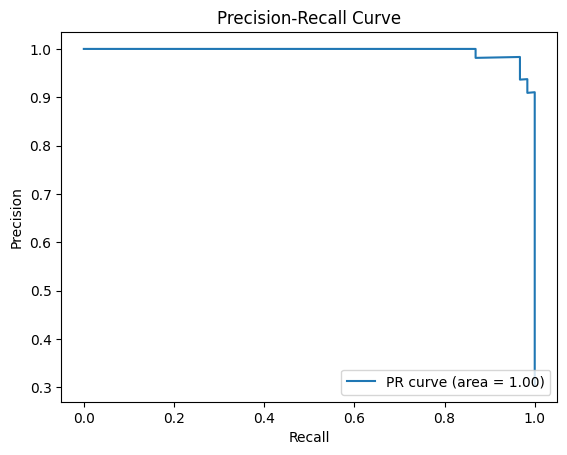

In [ ]:
pr_auc_plot(xgb_tuned, X_test, y_test)

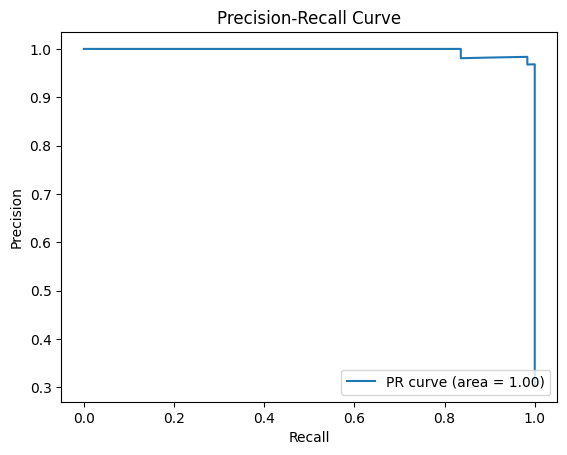

In [ ]:
pr_auc_plot(forest_tuned, X_test, y_test)

In [ ]:
def plot_confusion_matrix(model, x_test, y_test):
    # Predict class labels using models
    y_pred = model.predict(x_test)

    # Calculates the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix plot using a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

    # Customize the appearance of the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Show plot
    plt.show()

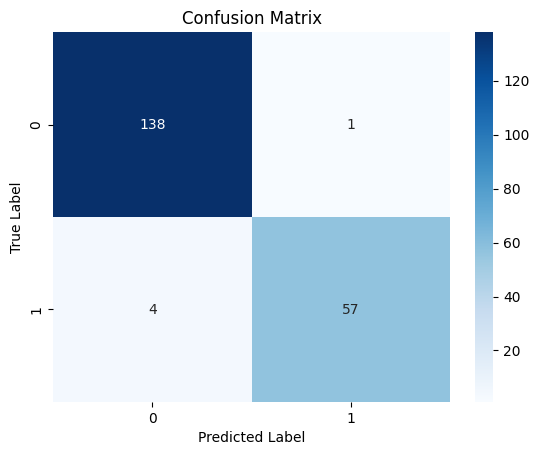

In [ ]:
plot_confusion_matrix(xgb_tuned, X_test, y_test)

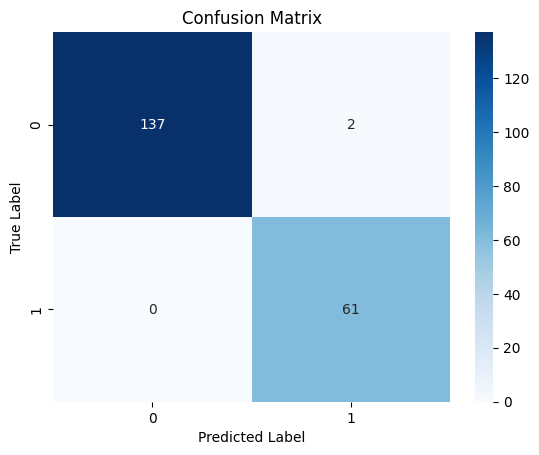

In [ ]:
plot_confusion_matrix(forest_tuned, X_test, y_test)

In [ ]:
def classification_report_func(model, x_test, y_test):
    # Predict class labels using models
    y_pred = model.predict(x_test)

    # print classification report
    report = classification_report(y_test, y_pred)
    print(report)

In [ ]:
classification_report_func(xgb_tuned, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.98      0.93      0.96        61

    accuracy                           0.97       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.97      0.97       200



In [ ]:
classification_report_func(forest_tuned, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       139
           1       0.97      1.00      0.98        61

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
df.columns[:7]

Index(['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'ebrw_score'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importances(pipeline, feature_names):
    # Mendapatkan model dari pipeline
    model = pipeline.steps[-1][1]

    # Memeriksa apakah model memiliki atribut 'feature_importances_'
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise AttributeError("Model tidak memiliki atribut 'feature_importances_'.")

    # Mengurutkan fitur berdasarkan importances
    indices = importances.argsort()[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    # Membuat plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), sorted_importances, align='center')
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Fitur')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()


In [ ]:
feature_names = ['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'ebrw_score']

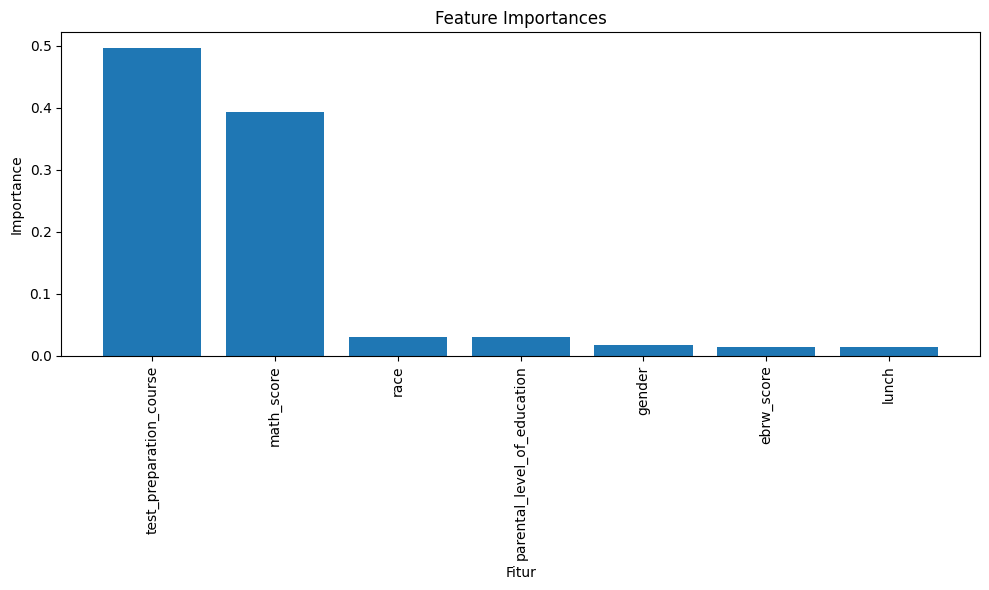

In [ ]:
plot_feature_importances(forest_pipe_tuned, feature_names)

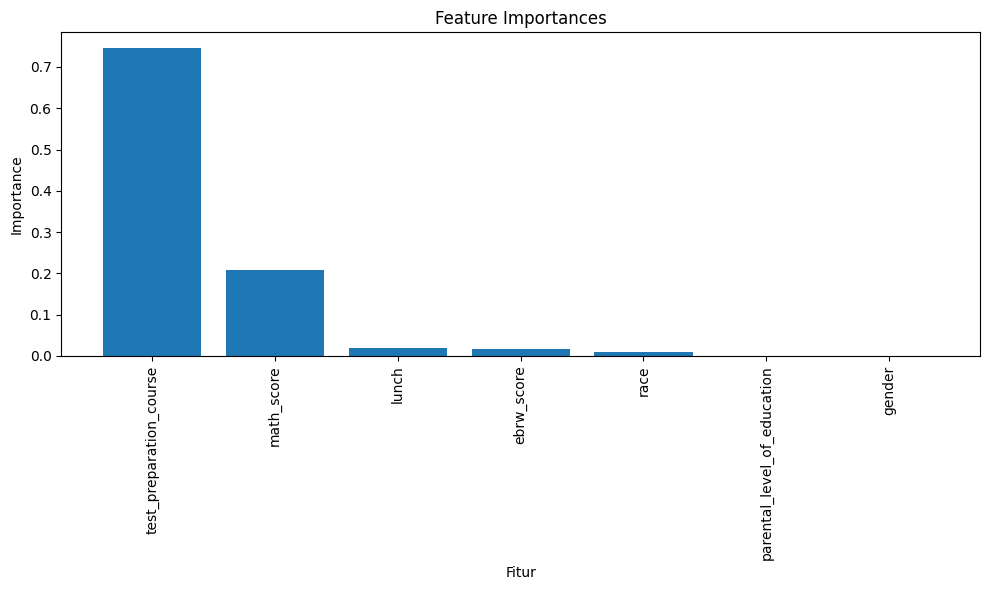

In [ ]:
plot_feature_importances(xgb_pipe_tuned, feature_names)

> - Baik dari model Random Forest maupun XGBoost, berdasarkan plot feature importance terlihat bahwa fitur `test_preparation_course` dan `math_score` menjadi fitur yang penting dalam memprediksi label. Oleh karena itu kedua fitur ini secara signifikan dapat mempengaruhi hasil prediksi yang ditentukan oleh Model ML.
> - Fitur lainnya seperti `lunch`, `ebrw_score`, `race`, `parental_level_of_education`, dan `gender` tidak dianggap fitur yang penting bagi Model ML dalam memprediksi label/target.

##**5.Deployment**

###**a. Save Best Model ML with pickle**

In [ ]:
import pickle

In [ ]:
pickle.dump(forest_tuned,open('forest_fix_tuned.pkl','wb'))

###**b.Load Best Model ML for Model Inference**

In [ ]:
model = pickle.load(open('forest_fix_tuned.pkl','rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'race', 'lunch',
                                                   'test_preparation_course']),
                                                 ('numerical', RobustScaler(),
                                                  ['math_score', 'ebrw_score']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['parental_level_of_education'],
                                                                 mapping=[{'col': 'parental_level_of_education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': some high school      0
high school           1
some college          2
associate's degree    3
bachelor's degree     4
master's degree       5
dtype: int64}]),
                                                  ['parental_level_of_education'])])),
                ('resampling', SMOTE(random_state=42)),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=84, random_state=42))])

In [ ]:
new_data = [{'gender': 'male',
             'race': 'group E',
             'parental_level_of_education': 'high school',
             'lunch':'free/reduced',
             'test_preparation_course': 'none',
             'math_score': 76,
             'ebrw_score': 70}
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,ebrw_score
0,male,group E,high school,free/reduced,none,76,70


In [ ]:
def prediction(pred):
    if pred[0]==0:
        return "Passing Score = Not Passed"
    else:
        return "Passing Score = Passed"

In [ ]:
pred = model.predict(data_testing1)

In [ ]:
prediction(pred)

'Passing Score = Not Passed'

##**6. Conclusion**

>Evaluasi Model:
- Karena menggunakan small dataset, model dapat dengan mudah memprediksi label/target binary class (0: not passed, 1: passed).
- Tantangannya disini yaitu kita juga menangani imbalance dataset, yang kebanyakan kasus perlu ditangani menggunakan teknik resampling baik SMOTE atau class weight agar tidak menimbulkan bias bagi model saat memprediksi label/target.
- Metrik evaluasi yang cocok digunakan yaitu f1_score, recall, atau pr-auc karena lebih sensitif terhadap kelas minoritas, sebab sampel data yang tidak seimbang antar kelas pada label (imbalance dataset).
- Berdasarkan hasil benchmark model, model dengan skor average precision (pr-auc) dengan rata-rata paling tinggi yaitu model Logistic Regression (LogReg).
- Disini kita memilih model Random Forest Classifier dan XGBpost Classifier,  karena kedua model ini tahan terhadap multikolinearitas  dan tidak memerlukan asumsi linearitas dalam sebuah korelasi antara fitur dengan label. Akan tetapi kita memilih random forest karena terlihat lebih baik performanya untuk digunakan dalam deployment.
- Walaupun demikian, semua model ML yang ada menunjukan performa yang sangat baik jika dilihat dari rata-rata skor average precision (> 0.90).  Faktor Bias-Variance Tradeoff juga perlu diperhatikan saat kita ingin membangun machine learning .
>
>Implementasi Model:
- Model ini dapat digunakan sebagai support sistem bagi para guru atau penyedia layanan tes SAT untuk dapat memprediksi secara otomatis apakah siswa dapat dinyatakan lulus atau tidak dalam tes SAT.
- Model ini lebih efektif dan efisien untuk diterapkan kedalam sistem website atau server/cloud computing agar dapat merekam pendataan siswa yang secara masif dan cepat tanpa memerlukan pengawasan dan penginputan data secara manual.
>
>Rekomendasi:
- Model dapat dikembangkan dengan menambahkan/menggunakan dataset yang lebih kompleks fitur dan besar jumlahnya, sehingga model dapat lebih beradapatasi dengan kompleksitas untuk memprediksi label/target secara lebih expert lagi.
